Note - currently works on VDI, not on AzureML 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

In [34]:
data = pd.read_csv('../fss_ml_mean_pred.csv').fillna(0)

In [35]:
data_xr = data.set_index(['latitude', 'longitude']).to_xarray()

In [36]:
data_xr

<xarray.Dataset>
Dimensions:       (latitude: 51, longitude: 30)
Coordinates:
  * latitude      (latitude) float64 49.41 49.59 49.78 ... 58.41 58.59 58.78
  * longitude     (longitude) float64 -5.484 -5.203 -4.922 ... 2.109 2.391 2.672
Data variables:
    ml_fss_0.0    (latitude, longitude) float64 0.9078 0.9094 0.8705 ... nan nan
    ml_fss_0.25   (latitude, longitude) float64 0.891 0.9107 0.8634 ... nan nan
    ml_fss_2.5    (latitude, longitude) float64 0.6483 0.6341 0.4805 ... nan nan
    ml_fss_7.0    (latitude, longitude) float64 0.6379 3.403e-08 ... nan nan
    ml_fss_10.0   (latitude, longitude) float64 0.0 9.313e-10 0.0 ... nan nan
    nwp_fss_0.0   (latitude, longitude) float64 0.7622 0.7619 0.7392 ... nan nan
    nwp_fss_0.25  (latitude, longitude) float64 0.7581 0.7921 0.7372 ... nan nan
    nwp_fss_2.5   (latitude, longitude) float64 0.01332 1.998e-15 ... nan nan
    nwp_fss_7.0   (latitude, longitude) float64 5.329e-15 0.1364 ... nan nan
    nwp_fss_10.0  (latitude, longitude) float64 0.0 0.1818 0.0 ... nan nan nan

In [37]:
def plot_fss(xrds, threshold, exceedance_val):
    
    ml_data = xrds[f'ml_fss_{threshold}']
    nwp_data = xrds[f'nwp_fss_{threshold}']
    
    vmin = min(ml_data.min(), nwp_data.min())
    vmin = max(vmin, 0)

    vmax = max(ml_data.max(), nwp_data.max())
    vmax = min(vmax, 1)
   
    # plot with three subplots
    # the first two panels shows radar and nwp data and final panel shows the difference
    fig, ax = plt.subplots(1, 3, subplot_kw={'projection': ccrs.Mercator()}, figsize=(15,5))
    
    extent= (-5.65, 1.7800, 49.9600, 55.65)
    ml_data.plot.pcolormesh(ax=ax[0], transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    ax[0].set_extent(extent)
    ax[0].coastlines()
    ax[0].set_title(f'ML model Fractional Skill Score \n (precip > {exceedance_val}mm)')

    nwp_data.plot.pcolormesh(ax=ax[1], transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    ax[1].set_extent(extent)
    ax[1].coastlines()
    ax[1].set_title(f'NWP Fractional Skill Score \n (precip > {exceedance_val}mm)')
    
    diff = ml_data - nwp_data
    diff.plot.pcolormesh(ax=ax[2], transform=ccrs.PlateCarree())
    ax[2].set_extent(extent)
    ax[2].coastlines()
    ax[2].set_title(f'ML model Fractional Skill Score \n (precip > {exceedance_val}mm)')

    plt.show()

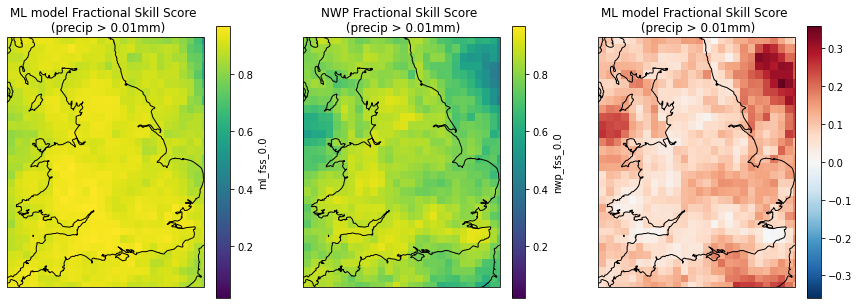

In [38]:
plot_fss(data_xr, '0.0', '0.01')

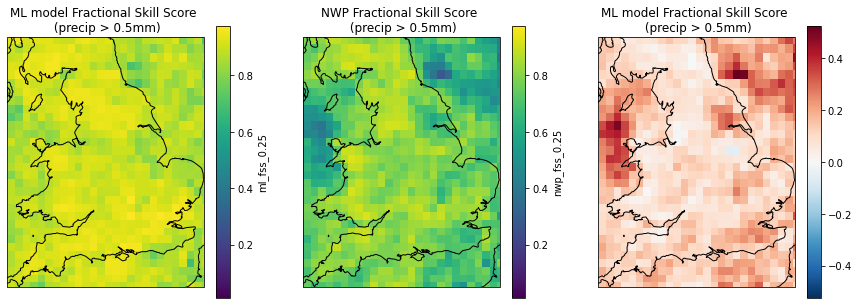

In [40]:
plot_fss(data_xr, '0.25', '0.5')

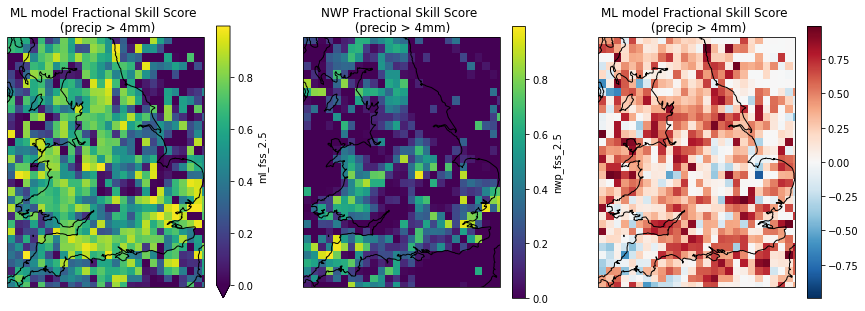

In [41]:
plot_fss(data_xr, '2.5', '4')

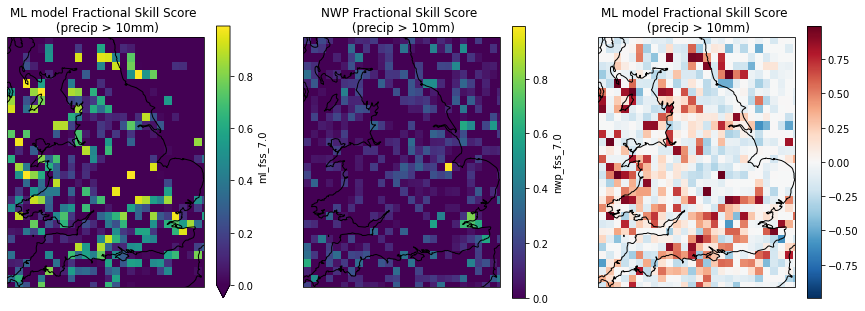

In [42]:
plot_fss(data_xr, '7.0', '10')